In [3]:
#2장 대리점 데이터를 가공하는 테크닉 10

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상 품 S,NaN,김우찬
2,2019-05-11 19:42,상 품 a,NaN,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품a,NaN,김강현


In [1]:
import pandas as pd
uriage_data = pd.read_csv("uriage.csv")
uriage_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상 품 S,NaN,김우찬
2,2019-05-11 19:42,상 품 a,NaN,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품a,NaN,김강현


In [4]:
kokyaku_data = pd.read_excel("kokyaku_daicho.xlsx")
kokyaku_data.head()

,고객이름,지역,등록일
0,김 현성,H시,2018-01-04 00:00:00
1,김 도윤,E시,42782
2,김 지한,A시,2018-01-07 00:00:00
3,김 하윤,F시,42872
4,김 시온,E시,43127


In [5]:
uriage_data["item_name"].head()

0      상품A
1    상 품 S
2    상 품 a
3      상품Z
4      상품a
Name: item_name, dtype: object

In [6]:
uriage_data["item_price"].head()

0     100.0
1       NaN
2       NaN
3    2600.0
4       NaN
Name: item_price, dtype: float64

In [8]:
uriage_data["purchase_date"] = pd.to_datetime(uriage_data["purchase_date"])

In [9]:
uriage_data["purchase_month"] = uriage_data["purchase_date"].dt.strftime("%Y%m")

In [10]:
res = uriage_data.pivot_table(index="purchase_month", columns="item_name", aggfunc="size", fill_value=0)
res

item_name,상 품 n,상품 E,상품 M,상품 P,상품 S,상품 W,상품 X,상품W,상 품O,상 품Q,...,상품k,상품l,상품o,상품p,상품r,상품s,상품t,상품v,상품x,상품y
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
201902,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,0
201903,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201904,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
201905,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
201906,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
201907,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,2,0,0,0,0,0


In [11]:
res = uriage_data.pivot_table(index="purchase_month", columns="item_name", values="item_price", aggfunc="size", fill_value=0)
res

item_name,상 품 n,상품 E,상품 M,상품 P,상품 S,상품 W,상품 X,상품W,상 품O,상 품Q,...,상품k,상품l,상품o,상품p,상품r,상품s,상품t,상품v,상품x,상품y
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
201902,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,0
201903,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201904,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
201905,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
201906,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
201907,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,2,0,0,0,0,0


In [12]:
uriage_data["item_name"] = uriage_data["item_name"].str.upper()
uriage_data["item_name"] = uriage_data["item_name"].str.replace("  ", "")
uriage_data["item_name"] = uriage_data["item_name"].str.replace(" ", "")
uriage_data.sort_values(by=["item_name"], ascending=True)

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:00,상품A,100.0,김가온,201906
1748,2019-05-19 20:22:00,상품A,100.0,김시훈,201905
223,2019-06-25 08:13:00,상품A,100.0,김유진,201906
1742,2019-06-13 16:03:00,상품A,100.0,김건희,201906
1738,2019-02-10 00:28:00,상품A,100.0,김하랑,201902
...,...,...,...,...,...
2880,2019-04-22 00:36:00,상품Y,NaN,김동욱,201904
2881,2019-04-30 14:21:00,상품Y,NaN,김하준,201904
1525,2019-01-24 10:27:00,상품Y,2500.0,김범준,201901
1361,2019-05-28 13:45:00,상품Y,2500.0,김수현,201905


In [14]:
uriage_data.isnull().any(axis=0)

purchase_date     False
item_name         False
item_price         True
customer_name     False
purchase_month    False
dtype: bool

In [15]:
flg_is_null = uriage_data["item_price"].isnull()
for trg in list(uriage_data.loc[flg_is_null, "item_name"].unique()):
    price = uriage_data.loc[(~flg_is_null) & (uriage_data["item_name"] ==trg), "item_price"].max()
    uriage_data["item_price"].loc[(flg_is_null) & (uriage_data["item_name"]==trg)] = price
uriage_data.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:00,상품A,100.0,김가온,201906
1,2019-07-13 13:05:00,상품S,1900.0,김우찬,201907
2,2019-05-11 19:42:00,상품A,100.0,김유찬,201905
3,2019-02-12 23:40:00,상품Z,2600.0,김재현,201902
4,2019-04-22 03:09:00,상품A,100.0,김강현,201904


In [16]:
for trg in list(uriage_data["item_name"].sort_values().unique()):
    print(trg + "의 최고가:" + str(uriage_data.loc[uriage_data["item_name"]==trg]
          ["item_price"].max()) +"의 최저가:" + str(uriage_data.loc[uriage_data["item_name"]==trg]["item_price"].min(skipna=False)))

상품A의 최고가:100.0의 최저가:100.0
상품B의 최고가:200.0의 최저가:200.0
상품C의 최고가:300.0의 최저가:300.0
상품D의 최고가:400.0의 최저가:400.0
상품E의 최고가:500.0의 최저가:500.0
상품F의 최고가:600.0의 최저가:600.0
상품G의 최고가:700.0의 최저가:700.0
상품H의 최고가:800.0의 최저가:800.0
상품I의 최고가:900.0의 최저가:900.0
상품J의 최고가:1000.0의 최저가:1000.0
상품K의 최고가:1100.0의 최저가:1100.0
상품L의 최고가:1200.0의 최저가:1200.0
상품M의 최고가:1300.0의 최저가:1300.0
상품N의 최고가:1400.0의 최저가:1400.0
상품O의 최고가:1500.0의 최저가:1500.0
상품P의 최고가:1600.0의 최저가:1600.0
상품Q의 최고가:1700.0의 최저가:1700.0
상품R의 최고가:1800.0의 최저가:1800.0
상품S의 최고가:1900.0의 최저가:1900.0
상품T의 최고가:2000.0의 최저가:2000.0
상품U의 최고가:2100.0의 최저가:2100.0
상품V의 최고가:2200.0의 최저가:2200.0
상품W의 최고가:2300.0의 최저가:2300.0
상품X의 최고가:2400.0의 최저가:2400.0
상품Y의 최고가:2500.0의 최저가:2500.0
상품Z의 최고가:2600.0의 최저가:2600.0


In [17]:
kokyaku_data["고객이름"].head()

0    김 현성
1    김 도윤
2    김 지한
3    김 하윤
4    김 시온
Name: 고객이름, dtype: object

In [18]:
uriage_data["customer_name"].head()

0    김가온
1    김우찬
2    김유찬
3    김재현
4    김강현
Name: customer_name, dtype: object

In [19]:
kokyaku_data["고객이름"] = kokyaku_data["고객이름"].str.replace("  ", "")
kokyaku_data["고객이름"] = kokyaku_data["고객이름"].str.replace(" ", "")
kokyaku_data["고객이름"].head()

0    김현성
1    김도윤
2    김지한
3    김하윤
4    김시온
Name: 고객이름, dtype: object

In [20]:
flg_is_serial = kokyaku_data["등록일"].astype("str").str.isdigit()
flg_is_serial.sum()

22

In [23]:
fromSerial = pd.to_timedelta(kokyaku_data.loc[flg_is_serial, "등록일"].astype("float"), unit="D") + pd.to_datetime("1900/01/01")
fromSerial

1     2017-02-18
3     2017-05-19
4     2018-01-29
21    2017-07-06
27    2017-06-17
47    2017-01-08
49    2017-07-15
53    2017-04-10
76    2018-03-31
80    2018-01-12
99    2017-06-01
114   2018-06-05
118   2018-01-31
122   2018-04-18
139   2017-05-27
143   2017-03-26
155   2017-01-21
172   2018-03-24
179   2017-01-10
183   2017-07-26
186   2018-07-15
192   2018-06-10
Name: 등록일, dtype: datetime64[ns]

In [24]:
fromString = pd.to_datetime(kokyaku_data.loc[~flg_is_serial, "등록일"])
fromString

0     2018-01-04
2     2018-01-07
5     2017-06-20
6     2018-06-11
7     2017-05-19
         ...    
195   2017-06-20
196   2018-06-20
197   2017-04-29
198   2019-04-19
199   2019-04-23
Name: 등록일, Length: 178, dtype: datetime64[ns]

In [25]:
kokyaku_data["등록일"] = pd.concat([fromSerial, fromString])
kokyaku_data

,고객이름,지역,등록일
0,김현성,H시,2018-01-04
1,김도윤,E시,2017-02-18
2,김지한,A시,2018-01-07
3,김하윤,F시,2017-05-19
4,김시온,E시,2018-01-29
...,...,...,...
195,김재희,G시,2017-06-20
196,김도영,E시,2018-06-20
197,김이안,F시,2017-04-29
198,김시현,H시,2019-04-19


In [26]:
kokyaku_data["등록연월"] = kokyaku_data["등록일"].dt.strftime("%Y%m")

In [27]:
rslt = kokyaku_data.groupby("등록연월").count()["고객이름"]
print(rslt)
print(len(kokyaku_data))

등록연월
201701    15
201702    11
201703    14
201704    15
201705    13
201706    14
201707    17
201801    13
201802    15
201803    17
201804     5
201805    19
201806    13
201807    17
201904     2
Name: 고객이름, dtype: int64
200


In [28]:
flg_is_serial = kokyaku_data["등록일"].astype("str").str.isdigit()
flg_is_serial.sum()

0

In [29]:
join_data = pd.merge(uriage_data, kokyaku_data, left_on="customer_name", right_on="고객이름", how="left")
join_data = join_data.drop("customer_name", axis=1)
join_data

,purchase_date,item_name,item_price,purchase_month,고객이름,지역,등록일,등록연월
0,2019-06-13 18:02:00,상품A,100.0,201906,김가온,C시,2017-01-26,201701
1,2019-07-13 13:05:00,상품S,1900.0,201907,김우찬,C시,2018-04-07,201804
2,2019-05-11 19:42:00,상품A,100.0,201905,김유찬,A시,2018-06-19,201806
3,2019-02-12 23:40:00,상품Z,2600.0,201902,김재현,D시,2018-07-22,201807
4,2019-04-22 03:09:00,상품A,100.0,201904,김강현,D시,2017-06-07,201706
...,...,...,...,...,...,...,...,...
2994,2019-02-15 02:56:00,상품Y,2500.0,201902,김정민,B시,2017-07-01,201707
2995,2019-06-22 04:03:00,상품M,1300.0,201906,김재원,E시,2018-03-31,201803
2996,2019-03-29 11:14:00,상품Q,1700.0,201903,김지율,B시,2017-03-15,201703
2997,2019-07-14 12:56:00,상품H,800.0,201907,김승주,E시,2018-07-15,201807


In [31]:
dump_data = join_data[["purchase_date", "purchase_month", "item_name", "item_price", "고객이름", "지역", "등록일"]]
dump_data

,purchase_date,purchase_month,item_name,item_price,고객이름,지역,등록일
0,2019-06-13 18:02:00,201906,상품A,100.0,김가온,C시,2017-01-26
1,2019-07-13 13:05:00,201907,상품S,1900.0,김우찬,C시,2018-04-07
2,2019-05-11 19:42:00,201905,상품A,100.0,김유찬,A시,2018-06-19
3,2019-02-12 23:40:00,201902,상품Z,2600.0,김재현,D시,2018-07-22
4,2019-04-22 03:09:00,201904,상품A,100.0,김강현,D시,2017-06-07
...,...,...,...,...,...,...,...
2994,2019-02-15 02:56:00,201902,상품Y,2500.0,김정민,B시,2017-07-01
2995,2019-06-22 04:03:00,201906,상품M,1300.0,김재원,E시,2018-03-31
2996,2019-03-29 11:14:00,201903,상품Q,1700.0,김지율,B시,2017-03-15
2997,2019-07-14 12:56:00,201907,상품H,800.0,김승주,E시,2018-07-15


In [32]:
dump_data.to_csv("dump_data.csv", index=False)

In [33]:
import_data = pd.read_csv("dump_data.csv")
import_data

,purchase_date,purchase_month,item_name,item_price,고객이름,지역,등록일
0,2019-06-13 18:02:00,201906,상품A,100.0,김가온,C시,2017-01-26 00:00:00
1,2019-07-13 13:05:00,201907,상품S,1900.0,김우찬,C시,2018-04-07 00:00:00
2,2019-05-11 19:42:00,201905,상품A,100.0,김유찬,A시,2018-06-19 00:00:00
3,2019-02-12 23:40:00,201902,상품Z,2600.0,김재현,D시,2018-07-22 00:00:00
4,2019-04-22 03:09:00,201904,상품A,100.0,김강현,D시,2017-06-07 00:00:00
...,...,...,...,...,...,...,...
2994,2019-02-15 02:56:00,201902,상품Y,2500.0,김정민,B시,2017-07-01 00:00:00
2995,2019-06-22 04:03:00,201906,상품M,1300.0,김재원,E시,2018-03-31 00:00:00
2996,2019-03-29 11:14:00,201903,상품Q,1700.0,김지율,B시,2017-03-15 00:00:00
2997,2019-07-14 12:56:00,201907,상품H,800.0,김승주,E시,2018-07-15 00:00:00


In [34]:
byItem = import_data.pivot_table(index="purchase_month", columns="item_name", aggfunc="size", fill_value=0)
byItem

item_name,상품A,상품B,상품C,상품D,상품E,상품F,상품G,상품H,상품I,상품J,...,상품Q,상품R,상품S,상품T,상품U,상품V,상품W,상품X,상품Y,상품Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,18,13,19,17,18,15,11,16,18,17,...,17,21,20,17,7,22,13,14,10,0
201902,19,14,26,21,16,14,14,17,12,14,...,22,22,22,23,19,22,24,16,11,1
201903,17,21,20,17,9,27,14,18,12,16,...,23,16,20,12,23,18,16,21,16,0
201904,17,19,24,20,18,17,14,11,18,13,...,20,20,16,16,11,15,14,16,20,0
201905,24,14,16,14,19,18,23,15,16,11,...,13,22,18,16,16,9,21,16,20,0
201906,24,12,11,19,13,18,15,13,19,22,...,15,16,21,12,18,20,17,15,13,0
201907,20,20,17,17,12,17,19,19,19,23,...,15,19,23,21,13,28,16,18,12,0


In [35]:
byPrice = import_data.pivot_table(index="purchase_month", columns="item_name", values="item_price", aggfunc="sum", fill_value=0)
byPrice

item_name,상품A,상품B,상품C,상품D,상품E,상품F,상품G,상품H,상품I,상품J,...,상품Q,상품R,상품S,상품T,상품U,상품V,상품W,상품X,상품Y,상품Z
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1800,2600,5700,6800,9000,9000,7700,12800,16200,17000,...,28900,37800,38000,34000,14700,48400,29900,33600,25000,0
201902,1900,2800,7800,8400,8000,8400,9800,13600,10800,14000,...,37400,39600,41800,46000,39900,48400,55200,38400,27500,2600
201903,1700,4200,6000,6800,4500,16200,9800,14400,10800,16000,...,39100,28800,38000,24000,48300,39600,36800,50400,40000,0
201904,1700,3800,7200,8000,9000,10200,9800,8800,16200,13000,...,34000,36000,30400,32000,23100,33000,32200,38400,50000,0
201905,2400,2800,4800,5600,9500,10800,16100,12000,14400,11000,...,22100,39600,34200,32000,33600,19800,48300,38400,50000,0
201906,2400,2400,3300,7600,6500,10800,10500,10400,17100,22000,...,25500,28800,39900,24000,37800,44000,39100,36000,32500,0
201907,2000,4000,5100,6800,6000,10200,13300,15200,17100,23000,...,25500,34200,43700,42000,27300,61600,36800,43200,30000,0


In [36]:
byCustomer = import_data.pivot_table(index="purchase_month", columns="고객이름", aggfunc="size", fill_value=0)
byCustomer

고객이름,김가온,김강민,김강현,김건우,김건희,김경민,김규민,김규현,김다온,김대현,...,김현수,김현승,김현우,김현준,김현진,김호준,정도형,정영훈,정우석,정준기
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,1,2,1,2,5,3,1,1,1,5,...,3,2,4,2,1,1,4,4,4,3
201902,3,1,4,3,3,5,2,3,1,5,...,5,3,7,0,0,1,2,0,2,2
201903,4,0,3,1,1,2,2,1,1,5,...,3,2,1,2,1,2,1,2,3,4
201904,1,0,3,0,2,1,2,6,2,4,...,0,4,3,1,1,2,2,4,3,1
201905,0,0,2,2,1,4,6,3,3,1,...,2,2,1,4,3,0,0,0,1,2
201906,5,0,3,0,2,1,6,1,1,1,...,2,4,1,0,4,2,2,0,0,2
201907,3,1,3,2,2,1,4,1,4,3,...,2,1,0,4,0,2,6,1,2,3


In [37]:
byRegion = import_data.pivot_table(index="purchase_month", columns="지역", aggfunc="size", fill_value=0)
byRegion

지역,A시,B시,C시,D시,E시,F시,G시,H시
purchase_month,,,,,,,,
201901,59,55,72,34,49,57,49,42
201902,71,46,65,48,61,52,43,63
201903,64,52,57,43,52,59,51,59
201904,64,48,54,45,48,58,40,52
201905,57,52,68,48,59,65,35,43
201906,53,47,61,30,51,51,58,58
201907,76,53,61,42,54,64,47,54


In [38]:
away_data = pd.merge(uriage_data, kokyaku_data, left_on="customer_name", right_on="고객이름", how="right")
away_data[away_data["purchase_date"].isnull()][["고객이름","등록일"]]

,고객이름,등록일
2999,김서우,2019-04-23


In [ ]:
#3장 고객의 전체 모습을 파악하는 테크닉 10

In [39]:
import pandas as pd
uselog = pd.read_csv('use_log.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [40]:
customer = pd.read_csv('customer_master.csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [41]:
class_master = pd.read_csv('class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [42]:
campaign_master = pd.read_csv('campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


In [45]:
customer_join = pd.merge(customer, class_master, on="class", how="left")
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [46]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [48]:
customer_join.groupby("class_name").count()["customer_id"]

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [49]:
customer_join.groupby("campaign_name").count()["customer_id"]

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

In [50]:
customer_join.groupby("gender").count()["customer_id"]

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [51]:
customer_join.groupby("is_deleted").count()["customer_id"]

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [52]:
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
customer_start = customer_join.loc[customer_join["start_date"] > pd.to_datetime("20180401")]
print(len(customer_start))

1361


In [53]:
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
customer_newer = customer_join.loc[(customer_join["end_date"] >= pd.to_datetime("20190331")) | (customer_join["end_date"].isna())]
print(len(customer_newer))
customer_newer["end_date"].unique()

2953


array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [54]:
customer_newer.groupby("class_name").count()["customer_id"]

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

In [55]:
customer_newer.groupby("campaign_name").count()["customer_id"]

campaign_name
0_입회비반액할인     311
1_입회비무료       242
2_일반         2400
Name: customer_id, dtype: int64

In [57]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["연월"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_months = uselog.groupby(["연월", "customer_id"],as_index=False).count()
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [58]:
uselog_customer = uselog_months.groupby("customer_id").agg(["mean","median","max","min"])["count"]
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer.head()

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


In [60]:
uselog["weekday"] = uselog["usedate"].dt.weekday
uselog_weekday = uselog.groupby(["customer_id", "연월", "weekday"], as_index = False).count()[["customer_id", "연월", "weekday", "log_id"]]
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)
uselog_weekday.head()

,customer_id,연월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [61]:
uselog_weekday = uselog_weekday.groupby("customer_id",as_index=False).max()
[["customer_id", "count"]]
uselog_weekday["routine_flg"] = 0
uselog_weekday["routine_flg"] = uselog_weekday["routine_flg"].where(uselog_weekday["count"]<4, 1)
uselog_weekday.head()

,customer_id,연월,weekday,count,routine_flg
0,AS002855,201903,6,5,1
1,AS008805,201903,6,4,1
2,AS009013,201804,0,2,0
3,AS009373,201903,6,5,1
4,AS015233,201903,6,5,1


In [62]:
customer_join = pd.merge(customer_join, uselog_customer, on="customer_id", how="left")
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routine_flg"]], on="customer_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1


In [63]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
max                 0
min                 0
routine_flg         0
dtype: int64

In [72]:
from dateutil.relativedelta import relativedelta
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join["membership_period"] = 0
for i in range(len(customer_join)):
    delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
    customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months
customer_join.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,memership_period,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47,47


In [66]:
customer_join[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [68]:
customer_join.groupby("routine_flg").count()["customer_id"]

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <a list of 10 Patch objects>)

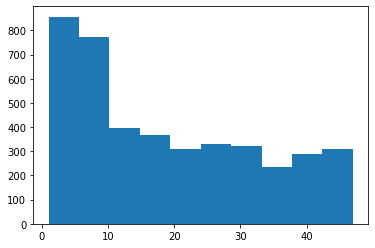

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(customer_join["membership_period"])

In [74]:
customer_end = customer_join.loc[customer_join["is_deleted"]==1]
customer_end.describe()

,is_deleted,price,mean,median,max,min,routine_flg,memership_period,membership_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.026667,8.026667
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.033692,5.033692
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.000000,4.000000
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.000000,7.000000
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.000000,11.000000
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.000000,23.000000


In [75]:
customer_stay = customer_join.loc[customer_join["is_deleted"]==0]
customer_stay.describe()

,is_deleted,price,mean,median,max,min,routine_flg,memership_period,membership_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,23.970443,23.970443
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.746761,13.746761
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.000000,1.000000
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.000000,12.000000
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.000000,24.000000
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.000000,35.000000
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.000000,47.000000


In [76]:
customer_join.to_csv("customer_join.csv", index=False)

In [ ]:
#4장 고객의 행동을 예측하는 테크닉 10

In [4]:
import pandas as pd
uselog = pd.read_csv('use_log.csv')
uselog.isnull().sum()
customer = pd.read_csv('customer_join.csv')
customer.isnull().sum()

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
memership_period        0
membership_period       0
dtype: int64

In [5]:
customer_clustering = customer[["mean", "median", "max", "min", "membership_period"]]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)

In [15]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(customer_clustering_sc)
customer_clustering["cluster"] = clusters.labels_
print(customer_clustering["cluster"].unique())
customer_clustering.head()

[2 0 3 1]


<ipython-input-15-2cfecc1d50df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_clustering["cluster"] = clusters.labels_


,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,2
1,5.083333,5.0,7,3,47,2
2,4.583333,5.0,6,3,47,2
3,4.833333,4.5,7,2,47,2
4,3.916667,4.0,6,1,47,2


In [16]:
customer_clustering.columns = ["월평균값", "월중앙값", "월최댓값", "월최솟값", "회원기간", "cluster"]
customer_clustering.groupby("cluster").count()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,761,761,761,761,761
1,846,846,846,846,846
2,1249,1249,1249,1249,1249
3,1336,1336,1336,1336,1336


In [17]:
customer_clustering.groupby("cluster").mean()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,3.051243,2.885677,4.750329,1.653088,9.269382
1,8.054608,8.039598,10.009456,6.160757,7.072104
2,4.677494,4.671337,7.232986,2.153723,36.915933
3,5.522518,5.373129,8.743263,2.686377,14.831587


In [18]:
from sklearn.decomposition import PCA
X = customer_clustering_sc
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df["cluster"] = customer_clustering["cluster"]

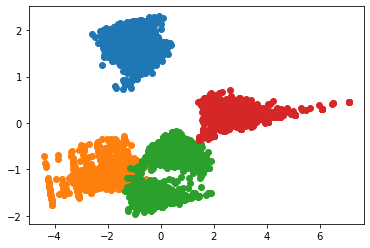

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in customer_clustering["cluster"].unique():
    tmp = pca_df.loc[pca_df["cluster"]==i]
    plt.scatter(tmp[0], tmp[1])

In [20]:
customer_clustering = pd.concat([customer_clustering, customer], axis=1)
customer_clustering.groupby(["cluster","is_deleted"],as_index=False).count()[["cluster","is_deleted","customer_id"]]

,cluster,is_deleted,customer_id
0,0,1,761
1,1,0,827
2,1,1,19
3,2,0,1230
4,2,1,19
5,3,0,785
6,3,1,551


In [23]:
customer_clustering.groupby(["cluster","routine_flg"],as_index=False).count()[["cluster","routine_flg","customer_id"]]

,cluster,routine_flg,customer_id
0,0,0,496
1,0,1,265
2,1,0,52
3,1,1,794
4,2,0,2
5,2,1,1247
6,3,0,229
7,3,1,1107


In [24]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["연월"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_months = uselog.groupby(["연월","customer_id"],as_index=False).count()
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [49]:
year_months = list(uselog_months["연월"].unique())
predict_data = pd.DataFrame()
for i in range(6, len(year_months)):
    tmp = uselog_months.loc[uselog_months["연월"]==year_months[i]]
    tmp.rename(columns={"count":"count_pred"}, inplace=True)
    for j in range(1, 7):
        tmp_before = uselog_months.loc[uselog_months["연월"]==year_months[i-j]]
        del tmp_before["연월"]
        tmp_before.rename(columns={"count":"count_{}".format(j-1)}, inplace=True)
        tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")
    predict_data = pd.concat([predict_data, tmp], ignore_index=True)
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,201810,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0


In [50]:
predict_data = predict_data.dropna()
predict_data = predict_data.reset_index(drop=True)
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0


In [51]:
predict_data = pd.merge(predict_data, customer[["customer_id", "start_date"]], on = "customer_id", how="left")
predict_data.head()


,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01


In [52]:
predict_data["now_date"] = pd.to_datetime(predict_data["연월", format="%Y%m")
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"])
from dateuil.relativedelta import relativedelta
predict_data["period"] = None

SyntaxError: invalid syntax (<ipython-input-52-8eafb358c923>, line 1)

In [57]:
predict_data["now_date"] = pd.to_datetime(predict_data["연월"], format="%Y%m")
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"])
from dateutil.relativedelta import relativedelta
predict_data["period"] = None
for i in range(len(predict_data)):
    delta = relativedelta(predict_data["now_date"][i], predict_data["start_date"][i])
    predict_data["period"][i] = delta.years*12 + delta.months
predict_data.head()

<ipython-input-57-50517ccf4ac0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data["period"][i] = delta.years*12 + delta.months


,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01,23
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01,35
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01,39
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01,16
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01,12


In [60]:
predict_data = predict_data.loc[predict_data["start_date"]>=pd.to_datetime("20180401")]
from sklearn import linear_model
import sklearn.model_selection
model = linear_model.LinearRegression()
X = predict_data[["count_0","count_1","count_2","count_3","count_4","count_5","period"]]
y = predict_data["count_pred"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)
model.fit(X_train, y_train)

LinearRegression()

In [63]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.609887390531779
0.6013746092260188


In [64]:
coef = pd.DataFrame({"feature_names":X.columns, "coefficient":model.coef_})
coef

,feature_names,coefficient
0,count_0,0.317062
1,count_1,0.201958
2,count_2,0.172407
3,count_3,0.177983
4,count_4,0.098278
5,count_5,0.057867
6,period,0.083842


In [65]:
x1 = [3, 4, 4, 6, 8, 7, 8]
x2 = [2, 2, 3, 3, 4, 6, 8]
x_pred = [x1, x2]

In [66]:
model.predict(x_pred)

array([3.85656353, 1.9782536 ])

In [67]:
uselog_months.to_csv("use_log_months.csv",index=False)

In [ ]:
#5장 회원 탈퇴를 예측하는 테크닉 10

In [1]:
import pandas as pd
customer = pd.read_csv('customer_join.csv')
uselog_months = pd.read_csv('use_log_months.csv')

In [2]:
year_months = list(uselog_months["연월"].unique())
uselog = pd.DataFrame()
for i in range(1, len(year_months)):
    tmp = uselog_months.loc[uselog_months["연월"]==year_months[i]]
    tmp.rename(columns={"count":"count_0"}, inplace=True)
    tmp_before = uselog_months.loc[uselog_months["연월"]==year_months[i-1]]
    del tmp_before["연월"]
    tmp_before.rename(columns={"count":"count_1"}, inplace=True)
    tmp = pd.merge(tmp, tmp_before, on="customer_id", how="left")
    uselog = pd.concat([uselog, tmp], ignore_index=True)
uselog.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,연월,customer_id,count_0,count_1
0,201805,AS002855,5,4.0
1,201805,AS009373,4,3.0
2,201805,AS015233,7,NaN
3,201805,AS015315,3,6.0
4,201805,AS015739,5,7.0


In [3]:
from dateutil.relativedelta import relativedelta
exit_customer = customer.loc[customer["is_deleted"]==1]
exit_customer["exit_date"] = None
exit_customer["end_date"] = pd.to_datetime(exit_customer["end_date"])
for i in range(len(exit_customer)):
    exit_customer["exit_date"].iloc[i] = exit_customer["end_date"].iloc[i] - relativedelta(months=1)
exit_customer["연월"] = exit_customer["exit_date"].dt.strftime("%Y%m")
uselog["연월"] = uselog["연월"].astype(str)
exit_uselog = pd.merge(uselog, exit_customer, on=["customer_id", "연월"], how="left")
print(len(uselog))
exit_uselog.head()

<ipython-input-3-2282bcdd32a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer["exit_date"] = None
<ipython-input-3-2282bcdd32a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exit_customer["end_date"] = pd.to_datetime(exit_customer["end_date"])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

33851


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,campaign_name,mean,median,max,min,routine_flg,calc_date,memership_period,membership_period,exit_date
0,201805,AS002855,5,4.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201805,AS009373,4,3.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201805,AS015233,7,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201805,AS015315,3,6.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201805,AS015739,5,7.0,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
exit_uselog = exit_uselog.dropna(subset=["name"])
print(len(exit_uselog))
print(len(exit_uselog["customer_id"].unique()))
exit_uselog.head()

1104
1104


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,campaign_name,mean,median,max,min,routine_flg,calc_date,memership_period,membership_period,exit_date
19,201805,AS055680,3,3.0,XXXXX,C01,M,2018-03-01,2018-06-30,CA1,...,2_일반,3.000000,3.0,3.0,3.0,0.0,2018-06-30,3.0,3.0,2018-05-30 00:00:00
57,201805,AS169823,2,3.0,XX,C01,M,2017-11-01,2018-06-30,CA1,...,2_일반,3.000000,3.0,4.0,2.0,1.0,2018-06-30,7.0,7.0,2018-05-30 00:00:00
110,201805,AS305860,5,3.0,XXXX,C01,M,2017-06-01,2018-06-30,CA1,...,2_일반,3.333333,3.0,5.0,2.0,0.0,2018-06-30,12.0,12.0,2018-05-30 00:00:00
128,201805,AS363699,5,3.0,XXXXX,C01,M,2018-02-01,2018-06-30,CA1,...,2_일반,3.333333,3.0,5.0,2.0,0.0,2018-06-30,4.0,4.0,2018-05-30 00:00:00
147,201805,AS417696,1,4.0,XX,C03,F,2017-09-01,2018-06-30,CA1,...,2_일반,2.000000,1.0,4.0,1.0,0.0,2018-06-30,9.0,9.0,2018-05-30 00:00:00


In [5]:
conti_customer = customer.loc[customer["is_deleted"]==0]
conti_uselog = pd.merge(uselog, conti_customer, on=["customer_id"], how="left")
print(len(conti_uselog))
conti_uselog = conti_uselog.dropna(subset=["name"])
print(len(conti_uselog))

33851
27422


In [6]:
conti_uselog = conti_uselog.sample(frac=1).reset_index(drop=True)
conti_uselog = conti_uselog.drop_duplicates(subset="customer_id")
print(len(conti_uselog))
conti_uselog.head()

2842


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,price,campaign_name,mean,median,max,min,routine_flg,calc_date,memership_period,membership_period
0,201809,HD146199,7,7.0,XXXXX,C01,F,2018-04-09,NaN,CA3,...,10500.0,1_입회비무료,8.250000,8.5,11.0,6.0,1.0,2019-04-30,12.0,12.0
1,201812,HI709813,9,NaN,XXXX,C02,F,2018-12-05,NaN,CA3,...,7500.0,1_입회비무료,7.750000,8.0,9.0,6.0,1.0,2019-04-30,4.0,4.0
2,201902,HD982934,5,4.0,XX,C01,F,2016-11-01,NaN,CA1,...,10500.0,2_일반,5.166667,5.0,7.0,2.0,1.0,2019-04-30,29.0,29.0
3,201810,GD257904,4,4.0,XXXX,C01,M,2015-08-01,NaN,CA1,...,10500.0,2_일반,4.750000,4.0,7.0,3.0,1.0,2019-04-30,44.0,44.0
4,201806,TS660622,4,1.0,XXXXXX,C03,M,2015-12-01,NaN,CA1,...,6000.0,2_일반,4.500000,4.5,8.0,1.0,1.0,2019-04-30,40.0,40.0


In [7]:
predict_data = pd.concat([conti_uselog, exit_uselog],ignore_index=True)
print(len(predict_data))
predict_data.head()

3946


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,campaign_name,mean,median,max,min,routine_flg,calc_date,memership_period,membership_period,exit_date
0,201809,HD146199,7,7.0,XXXXX,C01,F,2018-04-09,NaN,CA3,...,1_입회비무료,8.250000,8.5,11.0,6.0,1.0,2019-04-30,12.0,12.0,NaN
1,201812,HI709813,9,NaN,XXXX,C02,F,2018-12-05,NaN,CA3,...,1_입회비무료,7.750000,8.0,9.0,6.0,1.0,2019-04-30,4.0,4.0,NaN
2,201902,HD982934,5,4.0,XX,C01,F,2016-11-01,NaN,CA1,...,2_일반,5.166667,5.0,7.0,2.0,1.0,2019-04-30,29.0,29.0,NaN
3,201810,GD257904,4,4.0,XXXX,C01,M,2015-08-01,NaN,CA1,...,2_일반,4.750000,4.0,7.0,3.0,1.0,2019-04-30,44.0,44.0,NaN
4,201806,TS660622,4,1.0,XXXXXX,C03,M,2015-12-01,NaN,CA1,...,2_일반,4.500000,4.5,8.0,1.0,1.0,2019-04-30,40.0,40.0,NaN


In [8]:
predict_data["period"] = 0
predict_data["now_date"] = pd.to_datetime(predict_data["연월"], format="%Y%m")
predict_data["start_date"] = pd.to_datetime(predict_data["start_date"])
for i in range(len(predict_data)):
    delta = relativedelta(predict_data["now_date"][i], predict_data["start_date"][i])
    predict_data["period"][i] = int(delta.years*12 + delta.months)
predict_data.head()

<ipython-input-8-d308320693f9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data["period"][i] = int(delta.years*12 + delta.months)


,연월,customer_id,count_0,count_1,name,class,gender,start_date,end_date,campaign_id,...,median,max,min,routine_flg,calc_date,memership_period,membership_period,exit_date,period,now_date
0,201809,HD146199,7,7.0,XXXXX,C01,F,2018-04-09,NaN,CA3,...,8.5,11.0,6.0,1.0,2019-04-30,12.0,12.0,NaN,4,2018-09-01
1,201812,HI709813,9,NaN,XXXX,C02,F,2018-12-05,NaN,CA3,...,8.0,9.0,6.0,1.0,2019-04-30,4.0,4.0,NaN,0,2018-12-01
2,201902,HD982934,5,4.0,XX,C01,F,2016-11-01,NaN,CA1,...,5.0,7.0,2.0,1.0,2019-04-30,29.0,29.0,NaN,27,2019-02-01
3,201810,GD257904,4,4.0,XXXX,C01,M,2015-08-01,NaN,CA1,...,4.0,7.0,3.0,1.0,2019-04-30,44.0,44.0,NaN,38,2018-10-01
4,201806,TS660622,4,1.0,XXXXXX,C03,M,2015-12-01,NaN,CA1,...,4.5,8.0,1.0,1.0,2019-04-30,40.0,40.0,NaN,30,2018-06-01


In [9]:
predict_data.isna().sum()

연월                      0
customer_id             0
count_0                 0
count_1               257
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
memership_period        0
membership_period       0
exit_date            2842
period                  0
now_date                0
dtype: int64

In [10]:
predict_data = predict_data.dropna(subset=["count_1"])
predict_data.isna().sum()

연월                      0
customer_id             0
count_0                 0
count_1                 0
name                    0
class                   0
gender                  0
start_date              0
end_date             2637
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
memership_period        0
membership_period       0
exit_date            2637
period                  0
now_date                0
dtype: int64

In [11]:
target_col = ["campaign_name", "class_name", "gender", "count_1", "routine_flg", "period", "is_deleted"]
predict_data = predict_data[target_col]
predict_data.head()

,campaign_name,class_name,gender,count_1,routine_flg,period,is_deleted
0,1_입회비무료,0_종일,F,7.0,1.0,4,0.0
2,2_일반,0_종일,F,4.0,1.0,27,0.0
3,2_일반,0_종일,M,4.0,1.0,38,0.0
4,2_일반,2_야간,M,1.0,1.0,30,0.0
5,2_일반,0_종일,F,7.0,1.0,10,0.0


In [12]:
predict_data = pd.get_dummies(predict_data)
predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_0_입회비반액할인,campaign_name_1_입회비무료,campaign_name_2_일반,class_name_0_종일,class_name_1_주간,class_name_2_야간,gender_F,gender_M
0,7.0,1.0,4,0.0,0,1,0,1,0,0,1,0
2,4.0,1.0,27,0.0,0,0,1,1,0,0,1,0
3,4.0,1.0,38,0.0,0,0,1,1,0,0,0,1
4,1.0,1.0,30,0.0,0,0,1,0,0,1,0,1
5,7.0,1.0,10,0.0,0,0,1,1,0,0,1,0


In [13]:
del predict_data["campaign_name_2_일반"]
del predict_data["class_name_2_야간"]
del predict_data["gender_M"]
predict_data.head()

,count_1,routine_flg,period,is_deleted,campaign_name_0_입회비반액할인,campaign_name_1_입회비무료,class_name_0_종일,class_name_1_주간,gender_F
0,7.0,1.0,4,0.0,0,1,1,0,1
2,4.0,1.0,27,0.0,0,0,1,0,1
3,4.0,1.0,38,0.0,0,0,1,0,0
4,1.0,1.0,30,0.0,0,0,0,0,0
5,7.0,1.0,10,0.0,0,0,1,0,1


In [14]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection
exit = predict_data.loc[predict_data["is_deleted"]==1]
conti = predict_data.loc[predict_data["is_deleted"]==0].sample(len(exit))

X = pd.concat([exit, conti], ignore_index=True)
y = X["is_deleted"]
del X["is_deleted"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)
                         
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
print(y_test_pred)

[1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.

In [15]:
results_test = pd.DataFrame({"y_test":y_test, "y_pred":y_test_pred})
results_test.head()

,y_test,y_pred
959,1.0,1.0
282,1.0,1.0
306,1.0,1.0
1324,0.0,0.0
2037,0.0,0.0


In [16]:
correct = len(results_test.loc[results_test["y_test"]==results_test["y_pred"]])
data_count = len(results_test)
score_test = correct / data_count
print(score_test)

0.903041825095057


In [17]:
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.903041825095057
0.9809885931558935


In [18]:
X = pd.concat([exit, conti], ignore_index=True)
y = X["is_deleted"]
del X["is_deleted"]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)
                         
model = DecisionTreeClassifier(random_state=0, max_depth=5)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.9277566539923955
0.9309252217997465


In [19]:
importance = pd.DataFrame({"feature_names":X.columns, "coefficient": model.feature_importances_ })
importance

,feature_names,coefficient
0,count_1,0.347552
1,routine_flg,0.112872
2,period,0.531796
3,campaign_name_0_입회비반액할인,0.006728
4,campaign_name_1_입회비무료,0.000000
5,class_name_0_종일,0.001052
6,class_name_1_주간,0.000000
7,gender_F,0.000000


In [24]:
count_1 = 3
routine_flg = 1
period = 10
campaign_name ="입회비무료"
class_name = "종일"
gender = "F"

In [25]:
if campaign_name == "입회비반값할인":
    campaign_name_list = [1, 0]
elif campaign_name == "입회비무료":
    campaign_name_list = [0, 1]
elif campaign_name == "일반":
    campaign_name_list = [0,0]
if class_name == "종일":
    class_name_list = [1,0]
elif class_name == "주간":
    class_name_list = [0,1]    
elif class_name == "야간":
    class_name_list = [0,0]
if gender =="F":
    gender_list = [1]
elif gender =="M":
    gender_list = [0]
input_data = [count_1, routine_flg, period]
input_data.extend(campaign_name_list)
input_data.extend(class_name_list)
input_data.extend(gender_list)

In [26]:
print(model.predict([input_data]))
print(model.predict_proba([input_data]))

[1.]
[[0. 1.]]


In [ ]:
#6장 물류의 최적 경로 컨설팅

In [27]:
import pandas as pd

factories = pd.read_csv("tbl_factory.csv", index_col=0)
factories

,FCName,FCDemand,FCRegion
FCID,,,
FC00001,서울공장,28,북부
FC00002,수원공장,29,북부
FC00003,인천공장,31,북부
FC00004,대전공장,25,북부
FC00005,대구공장,21,남부
FC00006,광주공장,30,남부
FC00007,부산공장,25,남부
FC00008,울산공장,16,남부


In [28]:
warehouses = pd.read_csv("tbl_warehouse.csv", index_col=0)
cost = pd.read_csv("rel_cost.csv", index_col=0)
cost.head()

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8


In [29]:
trans = pd.read_csv("tbl_transaction.csv", index_col=0)
trans.head()

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30


In [31]:
join_data = pd.merge(trans, cost, left_on=["ToFC","FromWH"], right_on=["FCID","WHID"], how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8


In [33]:
join_data = pd.merge(join_data, factories, left_on="ToFC", right_on="FCID", how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,대전공장,25,북부
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,부산공장,25,남부
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,광주공장,30,남부
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,수원공장,29,북부
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,서울공장,28,북부


In [34]:
join_data = pd.merge(join_data, warehouses, left_on="FromWH", right_on="WHID", how="left")
join_data = join_data[["TransactionDate","Quantity","Cost","ToFC","FCName","FCDemand","FromWH","WHName","WHSupply","WHRegion"]]
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
1,2019-01-01 06:12:42,19,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
2,2019-01-01 06:32:32,31,0.9,FC00006,광주공장,30,WH00004,대전창고,60,남부
3,2019-01-01 07:17:06,18,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
4,2019-01-01 07:52:18,30,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부


In [35]:
north = join_data.loc[join_data["WHRegion"]=="북부"]
north.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
3,2019-01-01 07:17:06,18,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
4,2019-01-01 07:52:18,30,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부
7,2019-01-01 09:09:30,12,1.5,FC00001,서울공장,28,WH00003,수원창고,42,북부
8,2019-01-01 10:52:55,27,1.5,FC00003,인천공장,31,WH00003,수원창고,42,북부


In [36]:
south = join_data.loc[join_data["WHRegion"]=="남부"]
south.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
2,2019-01-01 06:32:32,31,0.9,FC00006,광주공장,30,WH00004,대전창고,60,남부
5,2019-01-01 08:56:09,31,0.3,FC00005,대구공장,21,WH00005,대구창고,72,남부
6,2019-01-01 09:00:15,33,0.7,FC00006,광주공장,30,WH00006,광주창고,65,남부
9,2019-01-01 14:12:51,21,0.7,FC00006,광주공장,30,WH00006,광주창고,65,남부


In [37]:
print("북부지사 총비용: " + str(north["Cost"].sum()) + "만원")
print("남부지사 총비용: " + str(south["Cost"].sum()) + "만원")

북부지사 총비용: 2189.3만원
남부지사 총비용: 2062.0만원


In [38]:
print("북부지사 총부품 운송개수: " + str(north["Quantity"].sum()) + "개")
print("남부지사 총부품 운송개수: " + str(south["Quantity"].sum()) + "개")

북부지사 총부품 운송개수: 49146개
남부지사 총부품 운송개수: 50214개


In [39]:
tmp = (north["Cost"].sum() / north["Quantity"].sum()) * 10000
print("북부지사의 부품 1개당 운송 비용: " + str(int(tmp)) + "원")
tmp = (south["Cost"].sum() / south["Quantity"].sum()) * 10000
print("북부지사의 부품 1개당 운송 비용: " + str(int(tmp)) + "원")

북부지사의 부품 1개당 운송 비용: 445원
북부지사의 부품 1개당 운송 비용: 410원


In [40]:
cost_chk = pd.merge(cost, factories, on="FCID", how="left")
print("북부지사의 평균 운송 비용: " + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="북부"].mean()) + "원")
print("남부지사의 평균 운송 비용: " + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="남부"].mean()) + "원")

북부지사의 평균 운송 비용: 1.075원
남부지사의 평균 운송 비용: 1.05원


In [41]:
import networkx as nx
import matplotlib.pyplot as plt

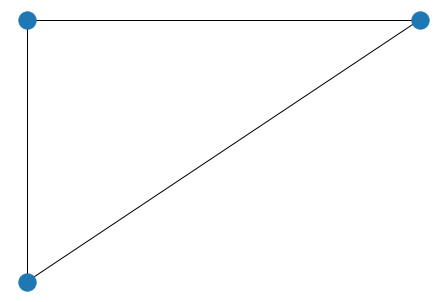

In [43]:
# 그래프 객체 생성
G=nx.Graph()

#노드 설정
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")

#엣지 설정
G.add_edge("nodeA","nodeB")
G.add_edge("nodeA","nodeC")
G.add_edge("nodeB","nodeC")

#좌표 설정
pos={}
pos["nodeA"]=(0,0)
pos["nodeB"]=(1,1)
pos["nodeC"]=(0,1)

#그리기
nx.draw(G,pos)

#표시
plt.show()

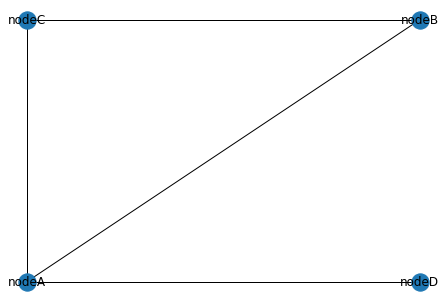

In [44]:
G.add_node("nodeD")
G.add_edge("nodeA","nodeD")
pos["nodeD"]=(1,0)

nx.draw(G,pos, with_labels=True)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

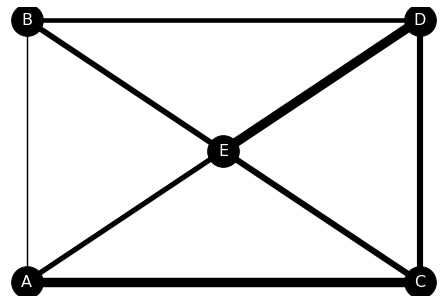

In [50]:
df_w = pd.read_csv('network_weight.csv')
df_p = pd.read_csv('network_pos.csv')

#엣지 가중치 리스트화
size = 10
edge_weights = []
for i in range(len(df_w)):
    for j in range(len(df_w.columns)):
        edge_weights.append(df_w.iloc[i][j]*size)
        
#그래프 객체 생성
G= nx.Graph()

#노드 설정
for i in range(len(df_w.columns)):
    G.add_node(df_w.columns[i])
    
#엣지 설정
for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        G.add_edge(df_w.columns[i],df_w.columns[j])
        
#좌표 설정
pos = {}
for i in range(len(df_w.columns)):
    node = df_w.columns[i]
    pos[node] = (df_p[node][0],df_p[node][1])
    
#그리기
nx.draw(G, pos, with_labels=True,font_size=16, node_size = 1000, node_color="k", font_color='w', width=edge_weights)

#표시
plt.show()

In [51]:
import pandas as pd
df_tr = pd.read_csv('trans_route.csv', index_col="공장")
df_tr.head()

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


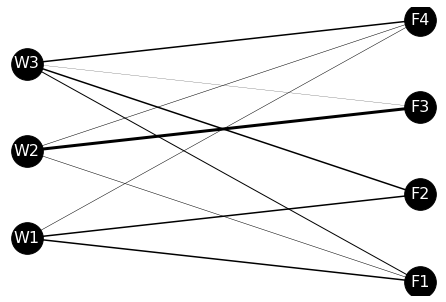

In [57]:
df_tr = pd.read_csv('trans_route.csv', index_col="공장")
df_pos = pd.read_csv('trans_route_pos.csv')

#그래프 객체 생성
G= nx.Graph()

#노드 설정
for i in range(len(df_pos.columns)):
    G.add_node(df_pos.columns[i])

#엣지 설정 가중치 리스트화
num_pre = 0
edge_weights = []
size = 0.1
for i in range(len(df_pos.columns)):
    for j in range(len(df_pos.columns)):
        if not(i==j):
            #엣지추가
            G.add_edge(df_pos.columns[i],df_pos.columns[j])
            #엣지가중치 추가
            if num_pre<len(G.edges):
                num_pre = len(G.edges)
                weight = 0
                if (df_pos.columns[i] in df_tr.columns)and(df_pos.columns[j] in df_tr.index):
                    if df_tr[df_pos.columns[i]][df_pos.columns[j]]:
                        weight = df_tr[df_pos.columns[i]][df_pos.columns[j]]*size
                elif(df_pos.columns[j] in df_tr.columns)and(df_pos.columns[i] in df_tr.index):
                    if df_tr[df_pos.columns[j]][df_pos.columns[i]]:
                        weight = df_tr[df_pos.columns[j]][df_pos.columns[i]]*size
                edge_weights.append(weight)
        
#좌표 설정
pos = {}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0],df_pos[node][1])
    
#그리기
nx.draw(G, pos, with_labels=True,font_size=16, node_size = 1000, node_color="k", font_color='w', width=edge_weights)

#표시
plt.show()

In [58]:
import pandas as pd

df_tr = pd.read_csv('trans_route.csv', index_col="공장")
df_tc = pd.read_csv('trans_cost.csv', index_col="공장")

def trans_cost(df_tr, df_tc):
    cost = 0
    for i in range(len(df_tc.index)):
        for j in range(len(df_tr.columns)):
            cost += df_tr.iloc[i][j]*df_tc.iloc[i][j]
    return cost

print("총 운송 비용:"+str(trans_cost(df_tr,df_tc)))

총 운송 비용:1493


In [59]:
df_tr = pd.read_csv('trans_route.csv', index_col="공장")
df_demand = pd.read_csv('demand.csv')
df_supply = pd.read_csv('supply.csv')

#수요측 제약 조건
for i in range(len(df_demand.columns)):
    temp_sum = sum(df_tr[df_demand.columns[i]])
    print(str(df_demand.columns[i])+"으로 운송량:"+str(temp_sum)+" (수요량:"+str(df_demand.iloc[0][i])+")")
    
    if temp_sum>=df_demand.iloc[0][i]:
        print("수요량을 만족시키고 있음")
    else:
        print("수요량을 만족시키지 못하고 있음. 운송경로 재계산 필요")

#공급측 제약 조건
for i in range(len(df_supply.columns)):
    temp_sum = sum(df_tr.loc[df_supply.columns[i]])
    print(str(df_supply.columns[i])+"부터의 운송량:"+str(temp_sum)+" (공급한계:"+str(df_supply.iloc[0][i])+")")
    
    if temp_sum<=df_supply.iloc[0][i]:
        print("공급한계 범위내")
    else:
        print("공급한계 초과. 운송경로 재계산 필요")

F1으로 운송량:30 (수요량:28)
수요량을 만족시키고 있음
F2으로 운송량:30 (수요량:29)
수요량을 만족시키고 있음
F3으로 운송량:32 (수요량:31)
수요량을 만족시키고 있음
F4으로 운송량:25 (수요량:25)
수요량을 만족시키고 있음
W1부터의 운송량:35 (공급한계:35)
공급한계 범위내
W2부터의 운송량:40 (공급한계:41)
공급한계 범위내
W3부터의 운송량:42 (공급한계:42)
공급한계 범위내


In [66]:
import pandas as pd
import numpy as np

df_tr_new = pd.read_csv('trans_route_new.csv', index_col="공장")
print(df_tr_new)

#총운송비용 재계산
print("총 운송비용(변경 후):"+str(trans_cost(df_tr_new,df_tc)))

#제약 조건 계산 함수
#수요측
def condition_demand(df_tr,df_demand):
    flag = np.zeros(len(df_demand.columns))
    for i in range(len(df_demand.columns)):
        temp_sum = sum(df_tr[df_demand.columns[i]])
        if (temp_sum>=df_demand.iloc[0][i]):
            flag[i] = 1
    return flag

#공급측
def condition_supply(df_tr,df_supply):
    flag = np.zeros(len(df_supply.columns))
    for i in range(len(df_supply.columns)):
        temp_sum = sum(df_tr.loc[df_supply.columns[i]])
        if (temp_sum<=df_supply.iloc[0][i]):
            flag[i] = 1
    return flag

print("수요조건 계산결과:"+str(condition_demand(df_tr_new,df_demand)))
print("공급조건 계산결과:"+str(condition_supply(df_tr_new,df_supply)))

    F1  F2  F3  F4
공장                
W1  15  15   0   0
W2   5   0  30  10
W3  10  15   2  15
총 운송비용(변경 후):1428
수요조건 계산결과:[1. 1. 1. 1.]
공급조건 계산결과:[1. 0. 1.]


In [11]:
import numpy as np
import pandas as pd


In [14]:
pip install pulp

SyntaxError: invalid syntax (<ipython-input-14-53ce2f979fa4>, line 1)

In [17]:
pip install ortoolpy

  Using cached ortoolpy-0.2.38-py3-none-any.whl (24 kB)
  Using cached more_itertools-8.12.0-py3-none-any.whl (54 kB)

  Attempting uninstall: more-itertools
    Found existing installation: more-itertools 8.4.0
    Uninstalling more-itertools-8.4.0:
      Successfully uninstalled more-itertools-8.4.0


In [18]:
from itertools import product
from pulp import LpVariable, lpSum, value
from ortoolpy import model_min, addvars, addvals

In [22]:
#데이터 불러오기
df_tc = pd.read_csv('trans_cost.csv', index_col="공장")
df_demand = pd.read_csv('demand.csv')
df_supply = pd.read_csv('supply.csv')

#초기 설정
np.random.seed(1)
nw = len(df_tc.index)
nf = len(df_tc.columns)
pr = list(product(range(nw), range(nf)))

#수리 모델 작성
m1 = model_min()
v1 = {(i,j):LpVariable('v%d_%d'%(i,j),lowBound=0) for i,j in pr}

m1 += lpSum(df_tc.iloc[i][j]*v1[i,j] for i,j in pr)
for i in range(nw):
    m1 += lpSum(v1[i,j] for j in range(nf)) <= df_supply.iloc[0][i]
for j in range(nf):
    m1 += lpSum(v1[i,j] for i in range(nw)) >= df_demand.iloc[0][j]
m1.solve()

#총 운송 비용 계산
df_tr_sol = df_tc.copy()
total_cost = 0
for k,x in v1.items():
    i,j = k[0],k[1]
    df_tr_sol.iloc[i][j] = value(x)
    total_cost += df_tc.iloc[i][j]*value(x)
    
print(df_tr_sol)
print("총 운송 비용:"+str(total_cost))

    F1  F2  F3  F4
공장                
W1  28   7   0   0
W2   0   0  31   5
W3   0  22   0  20
총 운송 비용:1296.0


In [3]:
import os
print("PYTHONPATH:", os.environ.get('PYTHONPATH'))
print("PATH:", os.environ.get('PATH'))

PYTHONPATH: None
PATH: C:\ProgramData\Anaconda3;C:\ProgramData\Anaconda3\Library\mingw-w64\bin;C:\ProgramData\Anaconda3\Library\usr\bin;C:\ProgramData\Anaconda3\Library\bin;C:\ProgramData\Anaconda3\Scripts;C:\ProgramData\Anaconda3\bin;C:\ProgramData\Anaconda3;C:\ProgramData\Anaconda3\Library\mingw-w64\bin;C:\ProgramData\Anaconda3\Library\usr\bin;C:\ProgramData\Anaconda3\Library\bin;C:\ProgramData\Anaconda3\Scripts;C:\Program Files (x86)\Common Files\Oracle\Java\javapath;C:\ProgramData\Anaconda3;C:\ProgramData\Anaconda3\Library\mingw-w64\bin;C:\ProgramData\Anaconda3\Library\usr\bin;C:\ProgramData\Anaconda3\Library\bin;C:\ProgramData\Anaconda3\Scripts;C:\Program Files (x86)\NAT Service;C:\ProgramData\Oracle\Java\javapath;C:\Program Files (x86)\Intel\iCLS Client;C:\Program Files\Intel\iCLS Client;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0;C:\Program Files\Intel\Intel(R) Managemen

In [6]:
pip install pandas

In [8]:
import pandas as pd

ImportError: Unable to import required dependencies:
numpy: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.8 from "C:\ProgramData\Anaconda3\python.exe"
  * The NumPy version is: "1.22.0"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: cannot import name '_from_dlpack' from 'numpy.core._multiarray_umath' (C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_multiarray_umath.cp38-win_amd64.pyd)


In [9]:
pip install -U pandas

  Using cached pandas-1.3.5-cp38-cp38-win_amd64.whl (10.2 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.0
    Uninstalling pandas-1.3.0:
      Successfully uninstalled pandas-1.3.0



In [13]:
pip install -U numpy

Requirement already up-to-date: numpy in c:\programdata\anaconda3\lib\site-packages (1.22.1)
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

#데이터 불러오기
df_tr = pd.read_csv('trans_route.csv', index_col="공장")
df_pos = pd.read_csv('trans_route_pos.csv')

ImportError: Unable to import required dependencies:
numpy: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.8 from "C:\ProgramData\Anaconda3\python.exe"
  * The NumPy version is: "1.22.0"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: cannot import name '_from_dlpack' from 'numpy.core._multiarray_umath' (C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_multiarray_umath.cp38-win_amd64.pyd)


In [27]:
import pandas as pd
import numpy as np

df_demand = pd.read_csv('demand.csv')
df_supply = pd.read_csv('supply.csv')

#제약 조건 계산 함수
#수요측
def condition_demand(df_tr,df_demand):
    flag = np.zeros(len(df_demand.columns))
    for i in range(len(df_demand.columns)):
        temp_sum = sum(df_tr[df_demand.columns[i]])
        if (temp_sum>=df_demand.iloc[0][i]):
            flag[i] = 1
    return flag

#공급측
def condition_supply(df_tr,df_supply):
    flag = np.zeros(len(df_supply.columns))
    for i in range(len(df_supply.columns)):
        temp_sum = sum(df_tr.loc[df_supply.columns[i]])
        if (temp_sum<=df_supply.iloc[0][i]):
            flag[i] = 1
    return flag

print("수요조건 계산결과:"+str(condition_demand(df_tr_sol,df_demand)))
print("공급조건 계산결과:"+str(condition_supply(df_tr_sol,df_supply)))

수요조건 계산결과:[1. 1. 1. 1.]
공급조건 계산결과:[1. 1. 1.]


In [31]:
import pandas as pd

df_material = pd.read_csv('product_plan_material.csv', index_col="제품")
print(df_material)
df_profit = pd.read_csv('product_plan_profit.csv', index_col="제품")
print(df_profit)
df_stock = pd.read_csv('product_plan_stock.csv', index_col="항목")
print(df_stock)
df_plan = pd.read_csv('product_plan.csv', index_col="제품")
print(df_plan)

     원료1  원료2  원료3
제품                
제품1    1    4    3
제품2    2    4    1
      이익
제품      
제품1  5.0
제품2  4.0
    원료1  원료2  원료3
항목               
재고   40   80   50
      생산량
제품       
제품1    16
제품2     0


In [32]:
def product_plan(df_profit,df_plan):
    profit = 0
    for i in range(len(df_profit.index)):
        for j in range(len(df_plan.columns)):
            profit += df_profit.iloc[i][j]*df_plan.iloc[i][j]
        return profit
    
print("총 이익:"+str(product_plan(df_profit,df_plan)))

총 이익:80.0


In [1]:
import pandas as pd
from pulp import LpVariable, lpSum, value
from ortoolpy import model_max, addvars, addvals

ImportError: Unable to import required dependencies:
numpy: 

IMPORTANT: PLEASE READ THIS FOR ADVICE ON HOW TO SOLVE THIS ISSUE!

Importing the numpy C-extensions failed. This error can happen for
many reasons, often due to issues with your setup or how NumPy was
installed.

We have compiled some common reasons and troubleshooting tips at:

    https://numpy.org/devdocs/user/troubleshooting-importerror.html

Please note and check the following:

  * The Python version is: Python3.8 from "C:\ProgramData\Anaconda3\python.exe"
  * The NumPy version is: "1.22.0"

and make sure that they are the versions you expect.
Please carefully study the documentation linked above for further help.

Original error was: cannot import name '_from_dlpack' from 'numpy.core._multiarray_umath' (C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_multiarray_umath.cp38-win_amd64.pyd)


In [60]:
df = df_material.copy()
inv = df_stock

m = model_max()
v1 = {(i):LpVariable('v%d'%(i),lowBound=0) for i in range(len(df_profit))}
m += lpSum(df_profit.iloc[i]*v1[i] for i in range(len(df_profit)))
for i in range(len(df_material.columns)):
    m += lpSum(df_material.iloc[j,i]*v1[j] for j in range(len(df_profit))) <= df_stock.iloc[:,i]
m.solve()
    
df_plan_sol = df_plan.copy()
for k,x in v1.itmes():
    df_plan_sol.iloc[k] = value(x)
print(df_plan_sol)
print("총 이익:"+str(value(m.objective)))

ImportError: cannot import name 'FuncType' from 'pandas._typing' (C:\ProgramData\Anaconda3\lib\site-packages\pandas\_typing.py)

In [55]:
pip install pandas --ignore-installed

Note: you may need to restart the kernel to use updated packages.Collecting pandas
  Using cached pandas-1.3.5-cp38-cp38-win_amd64.whl (10.2 MB)
  Using cached pytz-2021.3-py2.py3-none-any.whl (503 kB)
  Using cached numpy-1.22.0-cp38-cp38-win_amd64.whl (14.7 MB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)



ERROR: Could not install packages due to an EnvironmentError: [WinError 5] 액세스가 거부되었습니다: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\numpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

